<a href="https://colab.research.google.com/github/swetasinha1410/enumerate/blob/main/Copy_of_handwritten_random_forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**
We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9.


**Load Libraries**

In [ ]:
# liabraries for read  data
import numpy as np
import pandas as pd

#Libraries for plotting image
import matplotlib.pyplot as plt
import seaborn as sns

#SKLearn Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split


#Libraries for loading dataset
from sklearn.datasets import load_digits

**EDA**

In [ ]:
digits=load_digits()
digits.keys() # digits dataset is of dictionary

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
#Shape of digits
digits.images.shape

(1797, 8, 8)

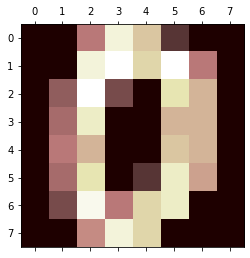

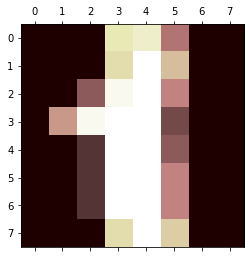

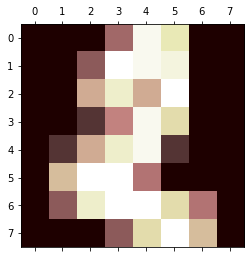

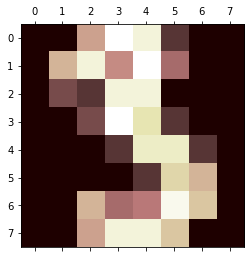

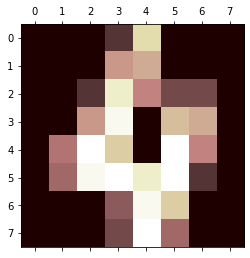

In [ ]:
# view image 

for i in range(5):
    plt.matshow(digits.images[i])
    plt.show()

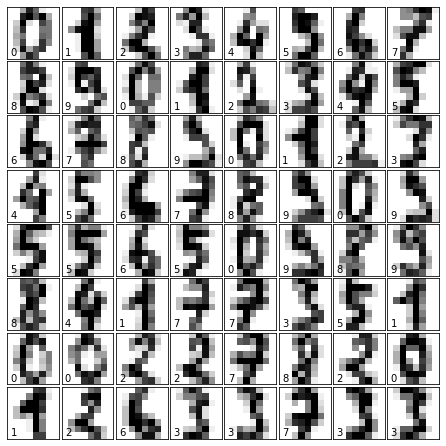

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

#Creating data for prediction

In [ ]:
data=pd.DataFrame(digits.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
data['target']=digits['target']
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


**Spliting Data set in Traing and Test set for Prediction**

In [ ]:
X=data.iloc[:,:-1]
Y=data['target']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

print(x_train.shape),print(x_test.shape),print(y_train.shape)

(1437, 64)
(360, 64)
(1437,)


(None, None, None)

**Building Model for Prediction**

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
score1=dt.score(x_test,y_test)
print(f"Accuracy score with DecisionTree Classifier {score1}")


Accuracy score with DecisionTree Classifier 0.8583333333333333


In [ ]:
rf=RandomForestClassifier(n_estimators=400)
rf.fit(x_train,y_train)
score=rf.score(x_test,y_test)
print(f"Accuracy score RandomForest Classifier {score}")

Accuracy score RandomForest Classifier 0.9777777777777777


With RandomForest Classifier , getting 97 % accuracy

In [ ]:
y_pred=rf.predict(x_test)
y_pred[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

**#Plotting Confusion Matrix**

Text(33.0, 0.5, 'True')

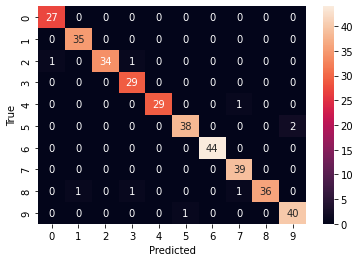

In [ ]:
confusion_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")


Conclusion : 

For Sklearn digit dataset for correct prediction of label we build model with Random Forest and Decison Tree classifier , with a accuracy of 97% and 85 %.

With plotting haetmap  we got conclusion that:

1. 2 was wrongly predicted as 0, once .
2. 8 was wrongly predicted as 1,3,7 once .
3. 9 was wrongly predicted as 5, once .